# **Question 1** - Integration Errors

## **a. Error Scaling**

**Why do the errors associated with the trapezoidal rule scale $\propto (\Delta x)^2$?**

In the trapezoidal rule, you approximate the area under the line by dividing it into equally spaced trapezoids and summing the areas of these trapezoids. Where $f(x)$ is the function that's being integrated over the interval [a, b] with n divisions, the width of each division $\Delta x$ (also known as $h$) can be found with $$\Delta x = \frac{b - a}{n}$$
 The error term is determined from the second derivative of $f(x)$; since the Trapezoidal rule is doing a linear fit between divisions, it truncated the Taylor expansion at the second-power polynomial term, which means it is therefore proportional to $\frac{f''(c)}{12}(\Delta x)^2$, where c is some point in the range of integration [a, b]. This tells us that as the interval $\Delta x$ decreases, the error decreases by the square.


**Why do the errors associated with Simpson's Rule scale $\propto (\Delta x)^4$?**

Simpsons rule is more accurate than the Trapezoidal rule; you approximate the integral of a function $f(x)$ over a given interval by dividing it into smaller divisions $\Delta x$ and using quadratic interpolation between each division. Since the quadratic interpolation is fitting a fourth order polynomial, from the Taylor expansion of this quadratic interpolation, the error here scales with the fourth derivative $f^4(x)$ of the function. Therefore, the error is proportional to the division size to the power of 4 $(\Delta x)^4$ .

## **b. Error proof**

If the value for the integral at spacing $h$ is $I_1$ and the value for the integral with spacing $2h$ is $I_2$:

**Show that the error in $I_1$ can be written $\epsilon _1\approx \frac{I_1 - I_2}{3}$ for the Trapezoidal Rule.**

The error in the Trapezoidal Rule can be expressed as $$E(h) = k_1h^2 = \epsilon _1 = X - I_1$$ 
$$\epsilon _1 + I_1 = X$$ 
where $k_1$ is some constant that depends on the specific function and interval and $X$ is the true value of the integral. Therefore, since we know that the error scales with $h^2$, with spacing $2h$ the error will be
$$E(2h) = k_1(2h)^2 = 4k_1h^2 = \epsilon_2 = X-I_2 = 4\epsilon_1$$
$$4\epsilon_1 = (\epsilon_1 + I_1) - I_2$$
$$3\epsilon_1 = I_1 - I_2$$
$$\therefore \epsilon_1 = \frac{I_1 - I_2}{3}$$

**Show that the error in $I_1$ can be written $\epsilon _1\approx \frac{I_1 - I_2}{15}$ for Simpson's Rule.**

Similar to above, the error in Simpson's Rule can be expressed as $$E(h) = k_1h^2 = \epsilon _1 = X - I_1$$ 
$$\epsilon _1 + I_1 = X$$ 
where $k_1$ is some constant that depends on the specific function and interval and $X$ is the true value of the integral. Therefore, since we know that the error scales with $h^4$, with spacing $2h$ the error will be
$$E(2h) = k_1(2h)^4 = 16k_1h^4 = \epsilon_2 = X-I_2 = 16\epsilon_1$$
$$16\epsilon_1 = X - I_2 = (\epsilon_1 + I_1) - I_2$$
$$15\epsilon_1 = I_1 - I_2$$
$$\therefore \epsilon_1 = \frac{I_1 - I_2}{15}$$

## **c. Compare Trapezoidal and Simpson's Rules**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a2_data = np.loadtxt('a2_data.txt', delimiter=' ', unpack = True)
data_x, data_y = a2_data[0], a2_data[1]

def trapezoidal_rule(x_pts, y_pts, h = 1):
    """The Trapezoidal Rule for numerical integration.

    Args:
        x_pts (array): An array of x values.
        y_pts (array): An array of y values.

    Returns:
        trap_area (float): The area under the curve approximated by the trapezoidal rule.
    """    
    # x_pts and y_pts are arrays of the same length
    N = len(x_pts)
    trap_area = y_pts[0]/2 + y_pts[-1]/2
    dx = x_pts[1] - x_pts[0]
    for i in range(1, N-1, h):
        trap_area += y_pts[i]
    trap_area *= dx
    
    return trap_area

def simpsons_rule(x_pts, y_pts, h = 1):
    """The Simpson's Rule for numerical integration.

    Args:
        x_pts (array): An array of x values.
        y_pts (array): An array of y values.

    Returns:
        simp_area (float): The area under the curve approximated by Simpson's rule.
    """    
    N = len(x_pts)
    simp_area = y_pts[0] + y_pts[-1]
    dx = x_pts[1] - x_pts[0]
    for i in range(1, N-1, h):
        if i%2 == 0:
            simp_area += 2*y_pts[i]
        else:
            simp_area += 4*y_pts[i]
    simp_area *= dx/3
    
    return simp_area

T_1 = trapezoidal_rule(data_x, data_y, h = 1)
T_2 = trapezoidal_rule(data_x, data_y, h = 2)
e_t = (T_1 - T_2)/3

S_1 = simpsons_rule(data_x, data_y, h = 1)
S_2 = simpsons_rule(data_x, data_y, h = 2)
e_s = (S_1 - S_2)/15

print('Trapezoidal Rule')
print('T_1 =', T_1, 'T_2 =', T_2, 'e_1 =', e_t)
print('Simpson\'s Rule')
print('S_1 =', S_1, 'S_2 =', S_2, 'e_2 =', e_s)

plt.plot(data_x, data_y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data from Input File')

The area returned by the Trapezoidal Rule was $1.4823547292600159 \pm 0.2387202720164829$.

The area returned by Simpson's Rule was $1.4829705173600634 \pm 0.031829369602197725$.

This difference makes sense as Simpson's Rule is more accurate than the Trapezoidal Rule, especially for a shape like the one produced by the data since it is very non-linear.

## **d. True Error**

In [ ]:
true_value = 1.482974344768713

trap_error = abs(T_1 - true_value)
simp_error = abs(S_1 - true_value)

print("Actual Trap Error:", trap_error)
print("Estimated Trap Error:", e_t)
print(f"Actual error is {trap_error/e_t*100}% of the estimated error.")

print("\nActual Simpson Error:", simp_error)
print("Estimated Simpson Error:", e_s)
print(f"Actual error is {simp_error/e_s*100}% of the estimated error.")


Based on the numbers acquired here, the estimate of the error is not good. In both the Trapezoidal and Simpson's Rules, the actual error is significantly less than 1% of the estimated errror. The actual error is very much smaller than that estimated by the approximation derived above.

# **Question 2** - Chemical Potential of a Fermi Gas

## **a. Evaluate Integral**

In statistical mechanics, the chemical potential $\mu$ of a gas on N non-interacting fermions in a volume V is given by the integral
$$ N = V\int_0^{\infty} \frac{8\pi p^2dp}{h^3}\frac{1}{1 + e^{(\epsilon - \mu)k_BT}} = V\int_0^{\infty} \frac{8\pi p^2dp}{h^3}\frac{1}{1 + e^{x - a}}$$
where $x = \epsilon/k_BT$, $p = \sqrt{2m\epsilon}$, $a = \mu/k_BT$, and $d\epsilon = k_BTdx$

$$ N = V\int_0^{\infty} \frac{8\pi (mk_BT)^{1/2}\sqrt{2xdx}}{h^3}\frac{1}{1 + e^{x - a}} $$

and substituting in $nQ = (mk_BT/2\pi\hbar^2)^{3/2}$

$$ N = V\int_0^{\infty} \frac{4n_Q}{\sqrt{\pi}}\frac{\sqrt{x}dx}{1 + e^{x - a}} $$

Therefore,

$$ \frac{N}{n_QV} = \frac{4}{\sqrt{\pi}}\int_0^{\infty}\frac{\sqrt{x}dx}{1 + e^{x - a}} $$

The aim here is to vary $a = \frac{\mu}{k_BT}$ and get out some values of $\frac{N}{n_QV}$ by numerically integrating the integral. Following this, the aim is to create an interpolation function that will produce a value of $\frac{\mu}{k_BT}$ given a value of $\frac{N}{n_QV}$.

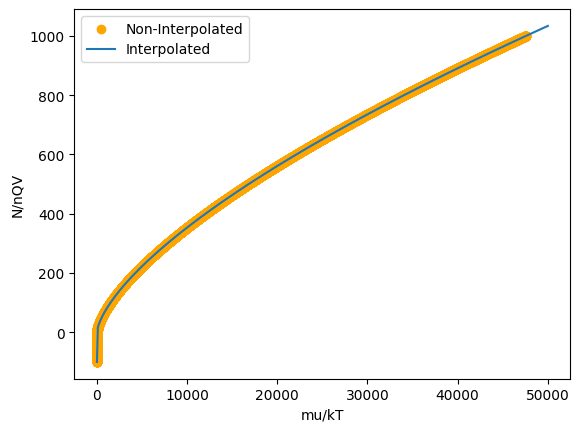

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson
import scipy as sc

def integral(x, a):
    res = 4/np.sqrt(np.pi)*np.sqrt(x)/(1 + np.exp(x - a))
    return res

a_list = np.linspace(-100, 1000, int(10E3)) # a = mu/kT, lower value is -600 since the function encounters overflow at lower values
integral_list = []
N = 1000 # Use 1000 x-points

for a in a_list:
    x = np.linspace(0, a + 100, N) # Gaussian distribution of x-points since the function has a Gaussian-ish shape
    func_y_points = integral(x, a) # Get y-points of the function within the integrand
    integral_list.append(simpson(func_y_points, x))


# Plot the values of the integrand
# plt.figure(1)
# plt.scatter(x, func_y_points, s = 1, label = f"a = {a}")
# plt.title("RHS of Equation")
# plt.xlabel("x")
# plt.ylabel("y")

spline = sc.interpolate.CubicSpline(integral_list, a_list)
x_vals = np.linspace(0, 50000, 500)

# Plot the LHS against the input mu/kT
plt.figure(2)
plt.scatter(integral_list, a_list, c = "orange", label = "Non-Interpolated")
plt.xlabel("mu/kT")
plt.ylabel("N/nQV")
plt.plot(x_vals, spline(x_vals), label = "Interpolated")
plt.legend()

In [59]:
def get_n_nQV(x):
    spline = sc.interpolate.CubicSpline(integral_list, a_list)
    interpolated_value = spline(x)

    return interpolated_value

print(get_n_nQV(0.5)) # Test the function

-1.2955177016376032


# **Question 3** - Maxwell Boltzmann

## **a. Generate numbers in a Maxwell-Boltzmann distribution**

The 3D Maxwell Boltzmann distribution is $$f(v)d^3v =\sqrt{\frac{2}{\pi}}v^2\exp({\frac{-v^2}{2}})d^3v$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import maxwell


def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
    #return np.exp(-1*abs(x**3))

def mb_func(v):
          T = 300 # Kelvin
          m = 28.0134 *  1.66054e-27 # mass of N2
          k_B = 1.38064852e-23 # Boltzmann constant
          #return (m/(2*np.pi*k_B*T))**(3/2) * 4*np.pi*v**2 * np.exp(-m*v**2/(2*k_B*T))
          return np.sqrt(2/np.pi)*v**2 * np.exp(-v**2/2)

def MaxwellBoltzmann(N):
    x_range = abs(np.random.normal(2, 2, N))
    y_range = np.random.uniform(0, 1.2, N)

    p_x = gaussian(x_range, 1.7, 2)
    f_x = mb_func(x_range)

    keep_y = y_range[np.where(y_range <= f_x/p_x)]
    keep_x = x_range[np.where(y_range <= f_x/p_x)]
    bad_y = y_range[np.where(y_range > f_x/p_x)]
    bad_x = x_range[np.where(y_range > f_x/p_x)]

    return x_range, p_x, f_x, keep_x, keep_y, bad_x, bad_y


In [ ]:
N_values = int(1E4)
x_range, p_x, f_x, keep_x, keep_y, bad_x, bad_y = MaxwellBoltzmann(N_values)

In [ ]:
plt.figure()
plt.scatter(x_range, p_x, label = "Gaussian")
plt.scatter(x_range, f_x, label = "Function")
plt.scatter(keep_x, keep_y, label = "Accepted", alpha = 0.1)
plt.scatter(bad_x, bad_y, label = "Rejected", alpha = 0.1)
plt.title("Maxwell-Boltzmann Distribution")
plt.legend()

EXPLAIN ALGROTIHM

## **b. Compare Histogram**

In [ ]:
N_values = int(1E5)
x_range, p_x, f_x, keep_x, keep_y, bad_x, bad_y = MaxwellBoltzmann(N_values)

plt.hist(keep_x, density=True, label = "Accepted Values")
plt.scatter(x_range, f_x, c = "r", label = "Theoretical Distribution")
plt.title("Maxwell-Boltzmann Distribution")
plt.legend()

## **c. Average Velocity**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

m = 28.0134 *  1.66054e-27 # mass of N2
T = 300 # Kelvin
k_B = 1.38064852e-23 # Boltzmann constant

theoretical_value = ((8*k_B*T)/(np.pi*m))**(1/2)

average_generated = np.mean(keep_x)

N_steps = [100, 1000, 10000, 100000, 1000000]
error_list = []
for N in N_steps:
    x_range, p_x, f_x, keep_x, keep_y, bad_x, bad_y = MaxwellBoltzmann(N)
    average_generated = np.mean(keep_x)
    error = abs(theoretical_value - average_generated)
    error_list.append(error)

plt.plot(N_steps, error_list)
plt.xlabel("Number of Generated Values")
plt.ylabel("Error")
